**Работа с реальными данными**

# Импорт библиотек

In [257]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn


from sklearn.preprocessing import StandardScaler # Стандартизация от мира scikit-learn

from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [258]:
def plot_line(x,y,title_x = '', title_y = '', ):
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        opacity=0.7,
        marker=dict(size = 5,
                    color='LightSkyBlue',
                    line=dict(
                        color='Blue',
                        width=1
            )),

        )
    )
    fig.update_layout(
            width=1000,
            height=600,
            xaxis_title=title_x,
            yaxis_title=title_y,
            yaxis_type = "log",
        template = "plotly_dark"
            )


    fig.show()

In [259]:
plt.style.use('dark_background')

# Набор данных

Так как набор данных с которым я работала не особо подходит для этого задания (у того задача регрессии), то я выбрала датасет о листьях ста видов растений с OpenMl.

В каталоге исходных данных содержатся бинарные изображения (маски) образцов листьев (цветные изображения не включены). Для каждого изображения имеется три признака: Форма, Край и Текстура. Для каждого признака задается вектор из 64 элементов для каждого образца листьев. Эти векторы представляются в виде смежных дескрипторов (для формы) или гистограмм (для текстуры и края). В этом датасете осуществляется предсказание на основе формы.

Каждая строка содержит 64-элементный вектор признаков, за которым следует метка класса. Всего 1600 образцов, по 16 образцов на каждый класс листьев (100 классов), пропущенных значений нет.

In [260]:
X, y  = fetch_openml('one-hundred-plants-shape', version=1, return_X_y=True, as_frame = True)

In [261]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64
0,0.000579,0.000609,0.000551,0.000554,0.000603,0.000614,0.000611,0.000611,0.000611,0.000594,...,0.000507,0.000533,0.000555,0.000565,0.000581,0.000597,0.000625,0.000624,0.000617,0.000614
1,0.000630,0.000661,0.000719,0.000651,0.000643,0.000640,0.000646,0.000624,0.000584,0.000546,...,0.000503,0.000520,0.000533,0.000564,0.000596,0.000623,0.000642,0.000661,0.000671,0.000667
2,0.000616,0.000615,0.000606,0.000568,0.000558,0.000552,0.000551,0.000552,0.000531,0.000530,...,0.000581,0.000590,0.000589,0.000566,0.000575,0.000618,0.000543,0.000592,0.000607,0.000602
3,0.000613,0.000569,0.000564,0.000607,0.000643,0.000647,0.000663,0.000658,0.000635,0.000600,...,0.000516,0.000536,0.000549,0.000542,0.000566,0.000592,0.000601,0.000609,0.000614,0.000603
4,0.000599,0.000552,0.000558,0.000569,0.000616,0.000639,0.000631,0.000634,0.000639,0.000596,...,0.000529,0.000543,0.000557,0.000562,0.000558,0.000591,0.000608,0.000613,0.000610,0.000594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000740,0.000718,0.000674,0.000631,0.000579,0.000549,0.000505,0.000466,0.000449,0.000423,...,0.000431,0.000481,0.000513,0.000569,0.000612,0.000663,0.000707,0.000735,0.000800,0.000740
1596,0.000672,0.000650,0.000643,0.000607,0.000572,0.000527,0.000501,0.000457,0.000440,0.000409,...,0.000392,0.000420,0.000433,0.000469,0.000492,0.000532,0.000567,0.000605,0.000631,0.000663
1597,0.000701,0.000642,0.000646,0.000612,0.000569,0.000531,0.000492,0.000453,0.000427,0.000388,...,0.000358,0.000396,0.000422,0.000461,0.000498,0.000538,0.000574,0.000605,0.000622,0.000663
1598,0.000709,0.000776,0.000716,0.000734,0.000708,0.000664,0.000618,0.000581,0.000543,0.000496,...,0.000425,0.000459,0.000482,0.000500,0.000546,0.000578,0.000614,0.000650,0.000683,0.000702


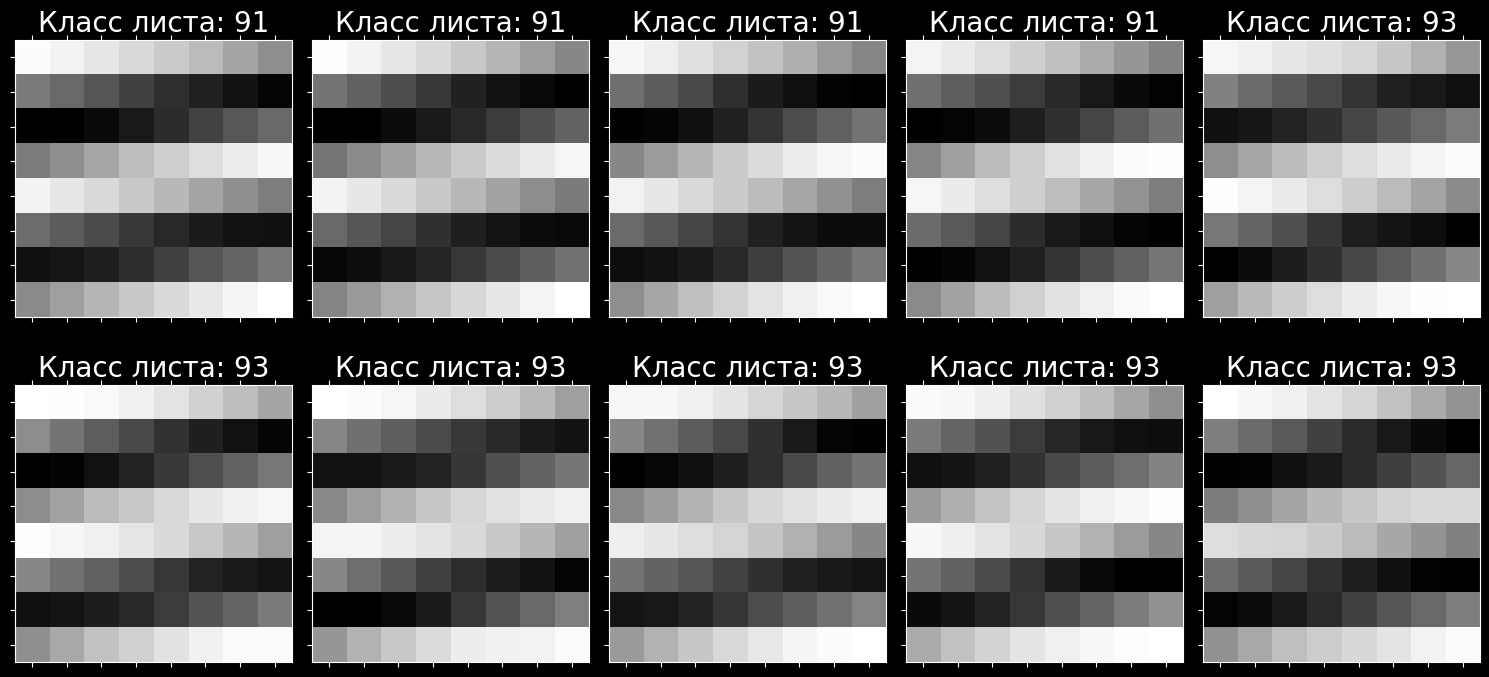

In [262]:
n =  1500

fig = plt.figure( figsize=(15,8) )

for i in range(0,10):
    ax = fig.add_subplot(2,5,i+1)
    ax.set_title(f"Класс листа: {y[i + n]}", size=20)
    ax.matshow(1-X.loc[i+n,'V1':'V64'].values.reshape((8,8)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()

In [263]:
X_plot = X.loc[0:1000,'V20':'V24'].copy() # данные из середины

fig = px.scatter_matrix(X_plot, # какой датафрей используем
                        )
fig.update_layout(height=800,
                  width=800,
                  template = "plotly_dark")

fig.show()

In [264]:
X_plot = X.loc[0:1000,'V1':'V5'].copy() # данные из первой строки

fig = px.scatter_matrix(X_plot, # какой датафрей используем
                        )
fig.update_layout(height=800,
                  width=800,
                  template = "plotly_dark")

fig.show()

Корреляция признаков высока. Присутствует линейная зависимость

# Применяем метод главных компонент

In [265]:
pca_test = PCA(n_components = 64)
pca_test.fit(X)

PCA(n_components=64)

In [266]:
pca_test_result_mnist = pca_test.transform(X)

In [267]:
pca_test_names = ['pca-'+str(x+1) for x in range(64)] # имена главных компонент. начинаем нумерацию с 1.
X.loc[:,pca_test_names] = pca_test_result_mnist # складываем всё в один датафрейм
X['target'] = y

In [268]:
EV_test=pca_test.explained_variance_ratio_

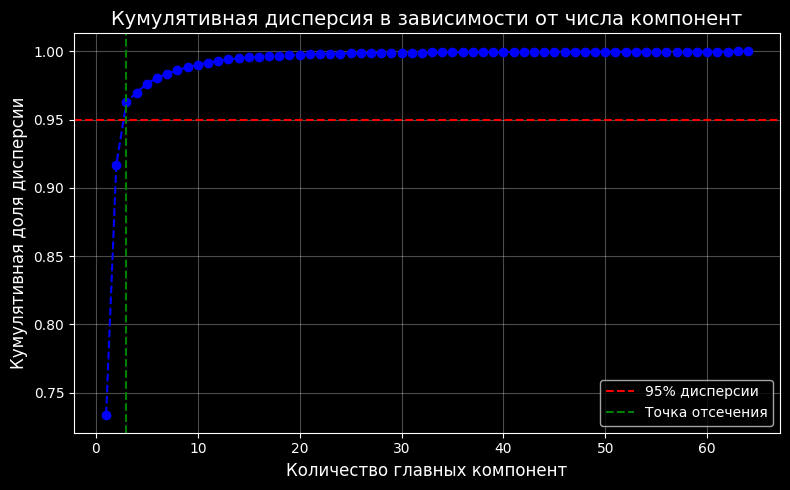

In [269]:
explained_variance_ratio = EV_test / np.sum(EV_test)

# Кумулятивная сумма долей дисперсии
cumulative_variance = np.cumsum(explained_variance_ratio)

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(EV_test) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Количество главных компонент', fontsize=12)
plt.ylabel('Кумулятивная доля дисперсии', fontsize=12)
plt.title('Кумулятивная дисперсия в зависимости от числа компонент', fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--', label='Точка отсечения')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Нам может хватить всего 4 компоненты 😵 После идут потери

In [270]:
pca = PCA(n_components = 4)
pca.fit(X)

pca_result_mnist = pca.transform(X)

pca_names = ['pca-'+str(x+1) for x in range(4)] # имена главных компонент. начинаем нумерацию с 1.
X.loc[:,pca_names] = pca_result_mnist # складываем всё в один датафрейм
X['target'] = y

EV=pca.explained_variance_ratio_

# Визуализация пространства главных компонент и их связь с исходными признаками

## Корреляционная матрица собственных значений

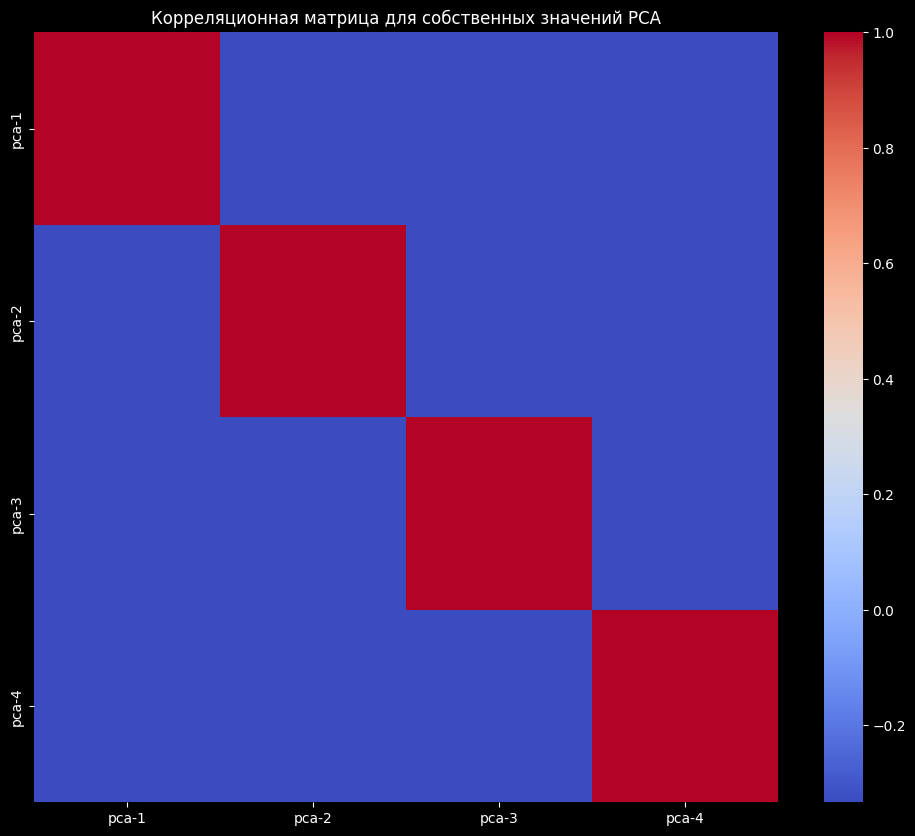

In [271]:
# Преобразуем собственные значения в DataFrame
EV_df = pd.DataFrame(np.diag(EV), columns=[f'pca-{i+1}' for i in range(len(EV))])

# Расчёт "корреляционной" матрицы для собственных значений
correlation_matrix_ev = EV_df.corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_ev, annot=False, cmap='coolwarm', cbar=True)
plt.title("Корреляционная матрица для собственных значений PCA")
plt.show()

По матрице корреляции видно, что главные компоненты PCA практически некоррелированы между собой, так как корреляции между различными собственными значениями близки к нулю, я бы даже сказала равны нулю

## Визуализация пространств главных компонент

In [272]:
def plot_multi(data,  names):
    # собираем оси данных, которые мы визуализируем
    axis = [["pca-1","pca-2",],
            ["pca-3","pca-2",],
            ["pca-1","pca-4",],
            ["pca-3","pca-4",],]

    # создаем полотно 2 на 2
    fig = make_subplots(
    rows=2, cols=2,
    subplot_titles = ("pca-1 vs pca-2","pca-3 vs pca-2",
            "pca-1 vs pca-4","pca-3 vs pca-4",)

    )

    # записываем место ячейки
    locs = [[1,1],
            [1,2],
            [2,1],
            [2,2]]

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, loc) in enumerate(zip(axis, locs)):
        temp_fig = px.scatter(data,
                             x=axi[0], y=axi[1],
                             color="target",
                             opacity = 0.5,
                             )

        temp_fig.update_yaxes(
                scaleanchor = "x",
                scaleratio = 1,
                )

        for trace in range(len(temp_fig["data"])):
            fig.add_trace(temp_fig["data"][trace],
                        row=loc[0], col=loc[1]
                        )
    fig.update_layout(height=800,
                  width=800,
                  template = "plotly_dark",
                      )
    fig.show()

In [273]:
pca_names = [str(x+1)+'-я главная компонента' for x in range(4)]

In [274]:
plot_multi(X, pca_names);

На самом деле не так уж плохо, учитывая что у нас 100 классов на 64 признака. На пространствах pca-1 vs pca-2 и pca-1 vs pca-4 так вообще можно увидеть некоторые четкие классы

# Применим пространство главных компонент в качестве входных данных для алгоритмов классификации

In [275]:
# Разделение данных на обучение и тест
X_original = X.loc[:, "V1":"V64"]  # Исходные признаки
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y, test_size=0.3, random_state=42
)

# Сравнение моделей с различным количеством компонент PCA
results = []

for n_components in [None, 4, 8, 16, 32, 64]:  # None = без PCA, и разные числа компонент
    # Создаем pipeline с PCA (если n_components не None) и классификатором
    if n_components is None:
        model = Pipeline([
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ])
    else:
        model = Pipeline([
            ('pca', PCA(n_components=n_components)),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ])

    # Обучение модели
    model.fit(X_train, y_train)

    # Оценка модели на тестовой выборке
    y_pred = model.predict(X_test)

    # Сохранение результатов
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division = 0)

    results.append({
        'n_components': n_components if n_components is not None else 'Original',
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    })

# Вывод результатов в табличной форме
results_df = pd.DataFrame(results)
print(results_df)

  n_components  accuracy  precision    recall  f1_score
0     Original  0.004167   0.000021  0.004167  0.000041
1            4  0.004167   0.000017  0.004167  0.000035
2            8  0.004167   0.000017  0.004167  0.000035
3           16  0.004167   0.000017  0.004167  0.000035
4           32  0.004167   0.000017  0.004167  0.000035
5           64  0.004167   0.000017  0.004167  0.000035


Как то все не очень

# Выводы

Для рассматриваемых данных достаточно 4 главных компонент, чтобы модель классификации показывала результаты, сопоставимые с использованием всех исходных признаков, что говорит о значительной корреляции между ними. Решение без числовых признаков хуже, если судить по метрикам